In [175]:
import koreanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)  # 열 개수 제한 없음

In [176]:
import warnings
# 경고(Warning)만 끄고, 오류(Exception)는 그대로 출력
warnings.filterwarnings('ignore')

# 1. 데이터 탐색 
- 신용카드 사기 탐지 데이터
- class : 0은 정상/ 1은 이상치(사기)

# 1-1. 데이터의 특징을 파악하시오. (EDA)

In [177]:
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv'
df = pd.read_csv(url, encoding = 'cp949')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [179]:
df['Class'].value_counts()  # 불균형 심함 ,오버샘플링 필요해 보임

0    993
1    200
Name: Class, dtype: int64

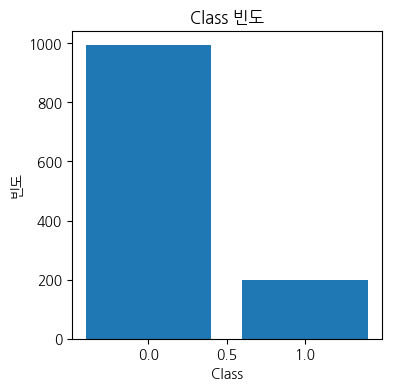

In [180]:
class_count = df['Class'].value_counts()

plt.figure(figsize = (4,4))
plt.bar(class_count.index, class_count.values, width = 0.8, bottom = None)
plt.title("Class 빈도")
plt.xlabel("Class")
plt.ylabel("빈도")
plt.show()

In [181]:
df.isnull().sum().to_frame().T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
df.drop('Time',axis = 1, inplace = True) # 의미 없는 변수 제거 

In [184]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


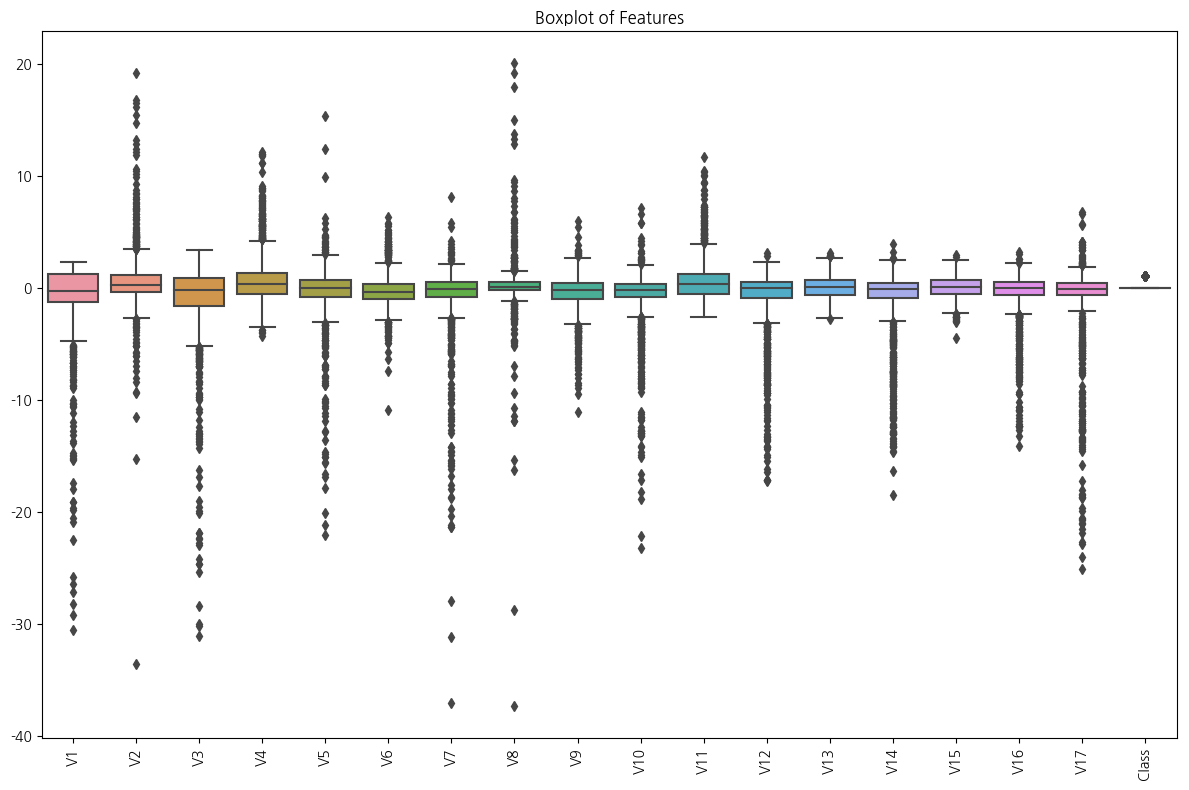

In [185]:
plt.figure(figsize = (12,8))

sns.boxplot(data = df.drop('Amount',axis =1))  # data를 무조건 써줘야함

plt.xticks(rotation=90) 
plt.title("Boxplot of Features")
plt.tight_layout()
plt.show()

### 신용사기에 대한 이상치 탐지가 목적이므로 이상치를 의미있는 이상치로 생각하고 제거하지 않는다.  

# 1-2. 상관관계를 시각화하고, 전처리가 필요함을 설명하시오.

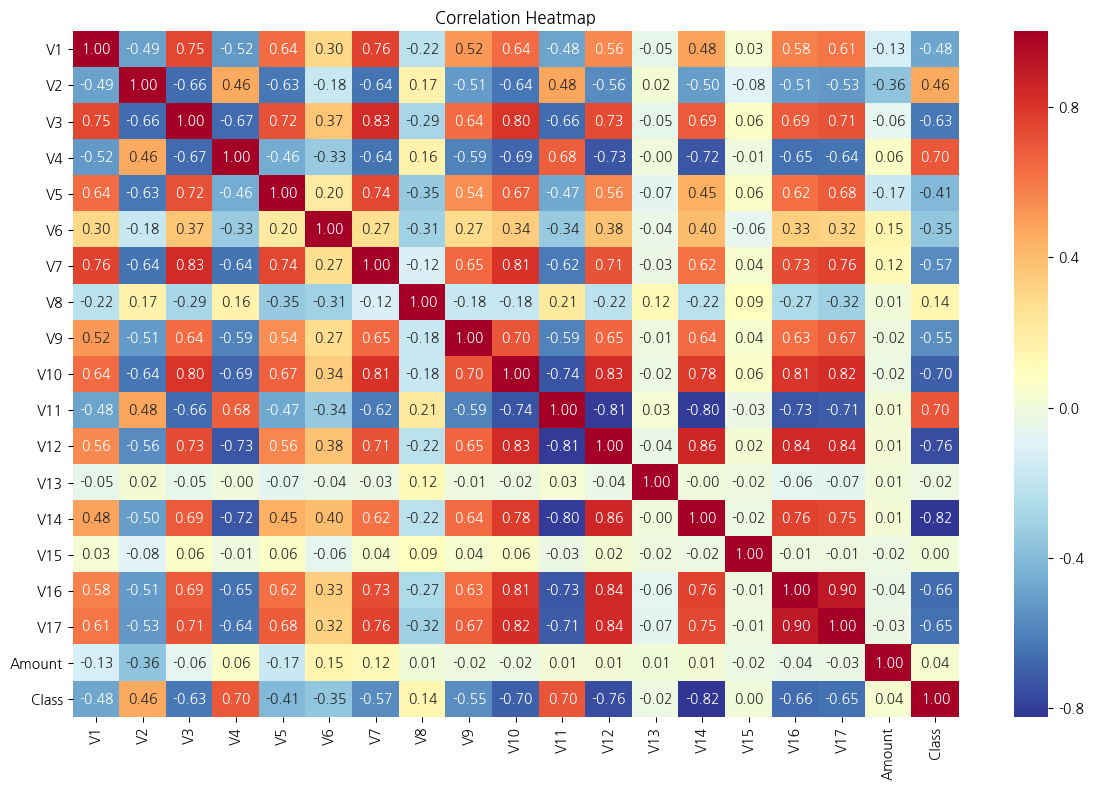

In [186]:
corr = df.corr(method='pearson')  # 또는 'spearman', 'kendall'

# 3. 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='RdYlBu_r', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

- 양의 상관관계와 음의 상관관계를 이루는 변수들이 많은 것을 확인할 수 있다. 이에 대해 PCA 주성분 분석을 실시한다.
- 신용사기 여부에 관한 빈도 수가 불균형을 이룬다. 이에 대해 소수 클래스에 대해 오버샘플링을 진행한다.

# 2. 차원 축소 

# 2-1. 차원축소 방법 2가지 이상을 비교하고 한가지를 선택하시오.

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['Amount']]

# 수치형 변수만 정규화 - Gender은 제거하고 스케일링
scaled_df = StandardScaler().fit_transform(X)
scaled_df = pd.DataFrame(scaled_df,columns = ['sc_Amount'])

In [189]:
pca_df = pd.concat([scaled_df, df.drop('Amount', axis =1)], axis =1)
print('변수 스케일링 수행')
display(pca_df.describe())


# 주성분 분석 
pca = PCA()
pca_fit = pca.fit(pca_df)

pca_result = pd.DataFrame({'고유값': pca.singular_values_,\
              '분산 설명력': pca.explained_variance_ratio_,\
            '누적 분산 설명력':np.cumsum(pca.explained_variance_ratio_)})
print('주성분 분석 결과')
display(pca_result)

변수 스케일링 수행


,sc_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Class
count,1.193000e+03,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,1.488983e-17,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,0.167645
std,1.000419e+00,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,0.373707
min,-4.039359e-01,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.000000
25%,-3.878485e-01,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,0.000000
50%,-3.085480e-01,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,0.000000
75%,-5.178709e-02,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,0.000000
max,1.475509e+01,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,1.000000


주성분 분석 결과


,고유값,분산 설명력,누적 분산 설명력
0,313.488896,0.657785,0.657785
1,108.238112,0.078415,0.736200
2,88.434776,0.052346,0.788547
3,77.164780,0.039855,0.828401
4,74.134401,0.036786,0.865187
5,56.291731,0.021209,0.886396
6,48.962432,0.016046,0.902442
7,48.466131,0.015722,0.918165
8,43.282361,0.012539,0.930704
9,41.417730,0.011482,0.942186


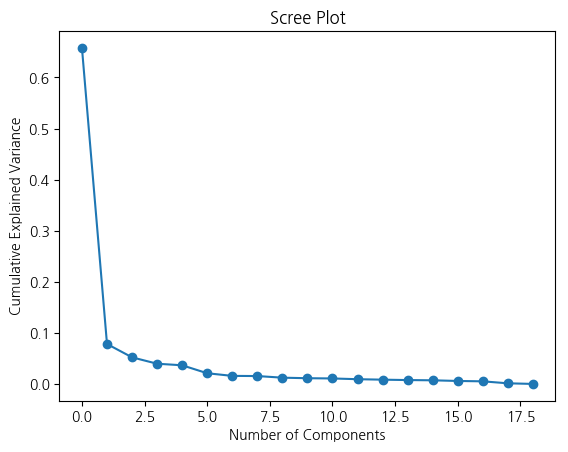

In [147]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-')
plt.show()

In [193]:
# 주성분 분석 
pca = PCA(n_components = 5)
pca_5 = pca.fit_transform(pca_df)
pca_5 = pd.DataFrame(data = pca_5, columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_5.head()

,pc1,pc2,pc3,pc4,pc5
0,-3.173311,-0.193234,-0.232735,-0.535186,-0.521651
1,5.907159,-2.267820,0.039901,0.337170,1.610707
2,-2.802843,2.287763,5.254510,0.080498,-2.483201
3,-2.495686,-0.281087,-0.073161,5.110990,1.450101
4,-3.190982,0.241924,-0.159882,0.112649,-0.846805


# 3-1. 오버 샘플링과 언더 샘플링의 장단점을 비교하고 선택하시오. 

# 3-2.샘플링 기법 중 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정하시오. 

### K-means SMOTE
- 전체 클래스(다수+소수)에 대해 k-means clustering 수행
- 다수 클래스를 포함하는 cluster을 오버 샘플링 대상에서 제외
- 소수 클래스만 포함하는 cluster의 주변값으로 synthetic data 생성

In [232]:
features = pca_5
target= df['Class'].astype('category')

In [233]:
target.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [234]:
from imblearn.over_sampling import KMeansSMOTE
from collections import Counter

km = KMeansSMOTE(random_state = 1, k_neighbors = 3)

km_features, km_target = km.fit_resample(features, target)
print(Counter(km_target))  # 두개의 클래스 개수가 아예 같지 않아질 수 있음

Counter({1: 994, 0: 993})


In [235]:
km_df = pd.DataFrame(np.c_[km_features,km_target], columns = list(features.columns)+['Class'])

In [236]:
km_df['Class'] = km_df['Class'].astype(int).astype('category')

In [243]:
km_df_X = km_df.drop('Class', axis = 1)
km_df_y = km_df['Class']

### 중요!!! : 
- 사기가 아닌 것을 분류해 내느라 몇 개의 사기 샘플을 놓치는 것보다 기존의 실제 신용사기 샘플을 모두 이상치로 확실하게 가려내는 것이 더 중요하다. 이처럼 데이터가 불균형할 때는 분류의 성능과 Target 데이터를 정확하게 분류해내는 목표가 일치하지 않게 되는 문제가 발생한다. 기존 모델은 소수의 클래스인 target의 중요도를 낮게 판단하므로 궁극적으로 분석가가 원하는 모델을 만들 수 없게 된다. 
- 즉, 데이터의 불균형이 있을 경우 모든 데이터를 정상으로 분류하여도 AUC값은 높아지게 된다.
    - 일반적인 F1-score는 전체적인 균형을 보지만, 과소 대표된 클래스의 중요도를 반영 못할 수도 있음

In [ ]:
# 목표: 사기를 놓치지 않도록 (True Positive ↑), 즉 Recall을 높이는 것이 중요하다!

1. Recall (재현율) — 소수 클래스에 집중하고 싶을 때!
2. F2-score (F1의 변형) — Recall에 더 가중치
	- F1-score는 Precision과 Recall의 균형
	- F2-score는 Recall을 더 중요하게 반영
- → 사기 탐지 같은 상황에 딱이다!

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import fbeta_score

In [255]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 123)

# Random Forest 학습
rf = RandomForestClassifier(random_state = 123)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_fbsc = fbeta_score(y_test, rf_pred, beta=2)

# Neural Network 학습
nn = MLPClassifier(random_state = 123)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_fbsc = fbeta_score(y_test, nn_pred, beta=2)

print("기존 불균형 데이터")
print("Random Forest 모델 F2-score :", round(rf_fbsc,3))
print("Neural Network 모델 F2-score :", round(nn_fbsc,3))

기존 불균형 데이터
Random Forest 모델 F2-score : 0.867
Neural Network 모델 F2-score : 0.861


In [256]:
X_train, X_test, y_train, y_test = train_test_split(km_df_X,km_df_y, test_size = 0.2, random_state = 123)
# Random Forest 학습
rf = RandomForestClassifier(random_state = 123)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_fbsc = fbeta_score(y_test, rf_pred, beta=2)

# Neural Network 학습
nn = MLPClassifier(random_state = 123)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_fbsc = fbeta_score(y_test, nn_pred, beta=2)

print("K-means SMOTE로 오버샘플링한 데이터")
print("Random Forest 모델 F2-score :", round(rf_fbsc,3))
print("Neural Network 모델 F2-score :", round(rf_fbsc,3))

K-means SMOTE로 오버샘플링한 데이터
Random Forest 모델 F2-score : 0.965
Neural Network 모델 F2-score : 0.965


# 통계분석

# 1. 2년 전 제품 생산량이 100,000개, 1년전 제품생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오(반올림하여 소수점 아래 둘째자리까지 표시)

In [3]:
# 기하평균 : 물가 변동률, 경제성장률, 임금 인상률 등 시간적으로 변화하는 **비율**의 대푯값 
# - 양수의 곱의 n제곱근

In [15]:
from scipy.stats.mstats import gmean

amount =[150000/100000,250000/150000] # 인상률 % 로
print("기하평균 {:,.2f}".format(gmean(amount)))
print("매년 약 1.58배씩 증가했다.")
print("연평균 상승률 {:,.2f}".format((gmean(amount)-1)*100))
print("매년 약 58.11% 증가했다")  # 연평균 생산율의 대푯값 : 158.11%

기하평균 1.58
매년 약 1.58배씩 증가했다.
연평균 상승률 58.11
매년 약 58.11% 증가했다


# 2. 12건의 광고시간을 측정한 데이터에서 평균은 15.5초, 분산은 3.2초였다. 이때, 광고시간의 90% 신뢰구간을 구하시오. 
- 모분산을 모르고 샘플 광고수가 30개 미만이므로 t검정을 사용
- 샘플 수가 30개보다 적더라도, 모분산을 알고 있다면 → 정규분포 사용

In [16]:
n = 12 # 표본 크기
x = 15.5 # 표본평균
s = np.sqrt(3.2) # 표본표준편차

conf_a = 0.1 # 신뢰수준 90% 기준
df = n-1

from scipy.stats import t
SE = s/ np.sqrt(n)
conf_t = t.ppf(1-conf_a/2, df)

print('신뢰수준 90% 기준 신뢰구간 : [{:.4f},{:.4f}]'.format(x-conf_t*SE, x+conf_t*SE))

신뢰수준 90% 기준 신뢰구간 : [14.5726,16.4274]


# 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 유의수준 0.1하에 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있음. 정규성을 만족한다고 가정).

In [32]:
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem7.csv'
df = pd.read_csv(url)
df

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


# 3-1. 귀무가설과 대립가설을 세우시오.

In [38]:
print("귀무가설 : 상,하류 간의 생물 다양성 점수는 차이가 없다.")
print("대립가설 : 상,하류 간의 생물 다양성 점수는 차이가 있다.")

귀무가설 : 상,하류 간의 생물 다양성 점수는 차이가 없다.
대립가설 : 상,하류 간의 생물 다양성 점수는 차이가 있다.


# 3-2. 검정통계량과 유의확률을 구하고, 연구가설 채택여부를 검정하시오.

In [33]:
# 모수 검정 - 정규성 만족한다 가정
# 같은 강에서 상·하류를 각각 측정한 것은 한 실험 단위(강) 안에서 두 조건을 비교하는 것
# 두 측정값 간 차이값을 중심으로 평균 차이가 0인지를 검정해야 하므로
# → 대응표본 t-검정

In [39]:
from scipy.stats import ttest_rel
tstat, p = ttest_rel(df['up'],df['down'])

print("t 통계량:", round(tstat, 3))
print("p-value:", round(p, 3))
print('p-value가 0.1보다 작으므로 귀무가설을 기각하여 상, 하류간의 생물 다양성 점수는 차이가 있다고 말할 수 있다.')

t 통계량: 3.353
p-value: 0.028
p-value가 0.1보다 작으므로 귀무가설을 기각하여 상, 하류간의 생물 다양성 점수는 차이가 있다고 말할 수 있다.


# 4. user-counts를 종속변수로 하는 데이터이다.

In [42]:
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem8.csv'
df = pd.read_csv(url)
df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


# 4-1. 분위수 회귀분석을 사용하여 회귀계수를 구하시오.(반올림하여 소수점 아래 둘째자리까지 표기)

In [45]:
import statsmodels.formula.api as smf

# 분위수 회귀 (중앙값 기준)
model = smf.quantreg('user_counts ~ temperature + wind + precipitation', data=df)
res = model.fit(q=0.5)

# 회귀계수 출력 (소수점 둘째 자리까지 반올림)
summary_df = res.params.round(2)
summary_df

Intercept        5941.84
temperature       268.89
wind             -129.41
precipitation     -83.38
dtype: float64

# 4-2. 4-1의 회귀계수를 활용하여 temperature 10.5, wind 8.2, precipitation 3.5일 때, user_counts를 예측하시오. (반올림하여 소수점 아래 둘째자리 표시)

In [46]:
# user_counts = 5941.84 + 268.89*temperature -129.41*wind -83.38*precipitation

In [56]:
user_counts_pred = res.params[0] + res.params[1]*10.5 + res.params[2]*8.2 + res.params[3]*3.5
print(round(user_counts_pred,2))

7412.24


# 5. 지하철 호선과 월별, 승객 수 간 상관관계가 있는 지 확인하시오. 

In [64]:
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv'
df = pd.read_csv(url)
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [62]:
pivot_table = df.groupby(['line', 'month']).size().unstack(fill_value=0)
pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12
line,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
# 반복이 있는 이원배치 분산분석 : 두 요인의 각 조합에 대해 두번 이상 반복 측정한 경우 

# 5-1. 귀무가설과 대립가설을 설정하시오.

- 교호작용 검정
    - 귀무가설 : 변수 line과 month간에 교호작용이 존재하지 않는다.
    - 대립가설 : 변수 line과 month간에 교호작용이 존재한다.

#### 대립가설 채택 시 : 교호작용이 유의할 경우 (존재할 경우) 주효과 검정은 무의미하고 교호작용 효과만 검정한다.
#### 귀무가설 채택 시 : 교호작용이 없을 경우 교호작용 효과를 오차항에 풀링한 후 주효과 검정을 진행한다. 

- 주효과 검정
    - 귀무가설 : 변수 line, month에 따른 total 값에 차이가 없다.
    - 대립가설 : 변수 line, month에 따른 total 값에 차이가 있다.
    
1. 호선 (line)의 효과에 대한 가설 
    - 귀무 : line에 따라 승객 수(total) 값에 차이가 없다.
2. 월 (month)의 효과에 대한 가설
    - 귀무 : month에 따라 승객 수(total) 값에 차이가 없다.

# 5-2. Type 3 Anova를 사용하여 상관관계가 있는지 검정하시오.

In [78]:
# 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("total~C(line)+C(month)+C(line):C(month)", df).fit()
atable = anova_lm(model)
display(atable)

,df,sum_sq,mean_sq,F,PR(>F)
C(line),2.0,2.147444e+06,1.073722e+06,10362.998525,2.007247e-50
C(month),11.0,3.206533e+04,2.915030e+03,28.134341,2.103496e-14
C(line):C(month),22.0,9.696908e+04,4.407686e+03,42.540665,1.582232e-19
Residual,36.0,3.730000e+03,1.036111e+02,NaN,NaN


In [72]:
print("유의수준 5%에서 귀무가설을 기각하므로 교호작용이 존재하는 것으로 말할 수 있다.")

유의수준 5%에서 귀무가설을 기각하므로 교호작용이 존재하는 것으로 말할 수 있다.


### 교호작용 시각화

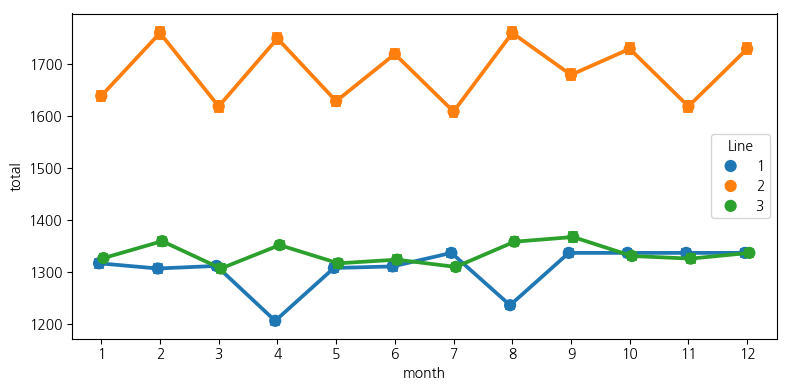

교호작용을 시각화 한 결과이다. 교차하는 지점이 없이 평행해야 교호작용이 없다고 말할 수 있다.
해당 그래프는 여러번 교차하므로 month변수와 line 변수 간에 교호작용이 있다고 말할 수 있다.


In [92]:
# 예시 데이터: df에는 'line', 'month', 'total' 컬럼이 있어야 함
# line과 month는 범주형 변수로 변환하기 
df['line'] = df['line'].astype('category')
df['month'] = df['month'].astype('category')

# 그래프: 교호작용 시각화
plt.figure(figsize=(8,4))
sns.pointplot(data=df, x='month', y='total', hue='line', dodge=True, markers='o', capsize=.1)
plt.legend(title='Line')
plt.tight_layout()
plt.show()
print('''교호작용을 시각화 한 결과이다. 교차하는 지점이 없이 평행해야 교호작용이 없다고 말할 수 있다.
해당 그래프는 여러번 교차하므로 month변수와 line 변수 간에 교호작용이 있다고 말할 수 있다.''')

## IF : C(line):C(month)의 p-value 값이 0.05보다 커서 귀무가설을 채택, 교호작용이 없다면

### -> 주효과 검정을 진행한다.
## model = ols("total~C(line)+C(month)", df).fit() 만 다시 실행

In [76]:
model = ols("total~C(line)+C(month)", df).fit()
atable2 = anova_lm(model)
display(round(atable2,3))

,df,sum_sq,mean_sq,F,PR(>F)
C(line),2.0,2147443.583,1073721.792,618.435,0.000
C(month),11.0,32065.333,2915.030,1.679,0.101
Residual,58.0,100699.083,1736.191,NaN,NaN


#### 만약 위와 같이 나올 경우 : 유의 수준 5% 기준으로 line은 주효과가 있는 것으로 확인된다.